# Q2: Lets go deeper! CaffeNet for PASCAL classification (20 pts)

**Note:** You are encouraged to reuse code from the previous task. Finish Q1 if you haven't already!


As you might have seen, the performance of the SimpleCNN model was pretty low for PASCAL. This is expected as PASCAL is much more complex than FASHION MNIST, and we need a much beefier model to handle it.

In this task we will be constructing a variant of the [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) architecture, known as CaffeNet. If you are familiar with Caffe, a prototxt of the network is available [here](https://github.com/BVLC/caffe/blob/master/models/bvlc_reference_caffenet/train_val.prototxt). A visualization of the network is available [here](http://ethereon.github.io/netscope/#/preset/caffenet).


## 2.1 Build CaffeNet (5 pts)
Here is the exact model we want to build. In this task, `torchvision.models.xxx()` is NOT allowed. Define your own CaffeNet! We use the following operator notation for the architecture:
1. Convolution: A convolution with kernel size $k$, stride $s$, output channels $n$, padding $p$ is represented as $conv(k, s, n, p)$.
2. Max Pooling: A max pool operation with kernel size $k$, stride $s$ as $maxpool(k, s)$.
3. Fully connected: For $n$ output units, $FC(n)$.
4. ReLU: For rectified linear non-linearity $relu()$

```
ARCHITECTURE:
-> image
-> conv(11, 4, 96, ’VALID’)
-> relu()
-> max_pool(3, 2)
-> conv(5, 1, 256, 'SAME')
-> relu()
-> max_pool(3, 2)
-> conv(3, 1, 384, 'SAME')
-> relu()
-> conv(3, 1, 384, 'SAME')
-> relu()
-> conv(3, 1, 256, ’SAME’)
-> relu()
-> max_pool(3, 2)
-> flatten()
-> fully_connected(4096)
-> relu()
-> dropout(0.5)
-> fully_connected(4096)
-> relu()
-> dropout(0.5)
-> fully_connected(20)
```

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset


class CaffeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.fc1 = nn.Linear(256 * 5 * 5, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 20)
        self.dropout = nn.Dropout(p=0.5) 
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        flat_x = x.view(-1, 256 * 5 * 5)
        out = self.fc1(flat_x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

## 2.2 Save the Model (5 pts)
Finish code stubs for saving the model periodically into `trainer.py`. **You will need these models later**


## 2.3 Train and Test (5pts)
Show clear screenshots of testing MAP and training loss for 50 epochs. Please evaluate your model to calculate the MAP on the testing dataset every 250 iterations. Use the following hyperparamters:
* batch_size=32
* Adam optimizer with lr=0.0001

**NOTE: SAVE AT LEAST 5 EVENLY SPACED CHECKPOINTS DURING TRAINING (1 at end)**

In [3]:
args = ARGS(epochs=50, batch_size=32, lr=0.0001, 
            use_cuda=True, gamma=0.9, log_every=250,
            val_every=250,
            save_at_end=True, save_freq=10)

model = CaffeNet()
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, model_name='models/q2')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.694476
test map (validation): 0.06026704430732975
Train Epoch: 1 [250 (59%)]	Loss: 0.242136
test map (validation): 0.10017538170986677
Train Epoch: 3 [500 (18%)]	Loss: 0.234352
test map (validation): 0.12173328525411864
Train Epoch: 4 [750 (78%)]	Loss: 0.212129
test map (validation): 0.14463678261710222
Train Epoch: 6 [1000 (37%)]	Loss: 0.232532
test map (validation): 0.1651594803069962
Train Epoch: 7 [1250 (96%)]	Loss: 0.196818
test map (validation): 0.1953057074402645
Train Epoch: 9 [1500 (55%)]	Loss: 0.248760
test map (validation): 0.21267779149708468
Train Epoch: 11 [1750 (15%)]	Loss: 0.224964
test map (validation): 0.21123213918901224
Train Epoch: 12 [2000 (74%)]	Loss: 0.222756
test map (validation): 0.23541097185089468
Train Epoch: 14 [2250 (33%)]	Loss: 0.226058
test map (validation): 0.25486454152797117
Train Epoch: 15 [2500 (92%)]	Loss: 0.186564
test map (validation): 0.274279819867863
Train Epoch: 17 [2750 (52%)]	Loss: 0.155841
test map (validat

**INSERT YOUR TENSORBOARD SCREENSHOTS HERE**

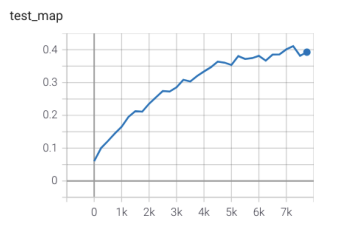

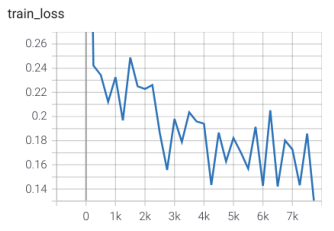

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('q2_1.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q2_2.png')
plt.imshow(img)
plt.axis("off")
plt.show()

## 2.4 Visualizing: Conv-1 filters (5pts)
Extract and compare the conv1 filters, at different stages of the training (at least from 3 different iterations). Show at least 5 filters.

In [ ]:
# visualize below

0 epoch


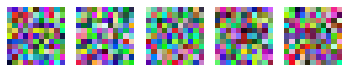

30 epoch


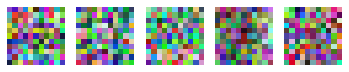

50 epoch


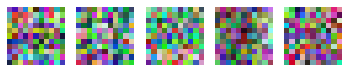

In [9]:
import numpy as np

model1, model2, model3 = CaffeNet(), CaffeNet(), CaffeNet()
model1.load_state_dict(torch.load("models/q2_0"))
model2.load_state_dict(torch.load("models/q2_30"))
model3.load_state_dict(torch.load("models/q2_50"))
model1.eval()
model2.eval()
model3.eval()

print("0 epoch")
weights1 = model1.conv1.weight.data.numpy()
fig1, ax1 = plt.subplots(1, 5)
for i in range(5):
    feature_map = np.moveaxis(weights1[i], 0, -1)
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    ax1[i].axis("off")
    ax1[i].imshow(feature_map)
plt.show()

print("30 epoch")
weights2 = model2.conv1.weight.data.numpy()
fig2, ax2 = plt.subplots(1, 5)
for i in range(5):
    feature_map = np.moveaxis(weights2[i], 0, -1)
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    ax2[i].axis("off")
    ax2[i].imshow(feature_map)
plt.show()

print("50 epoch")
weights3 = model3.conv1.weight.data.numpy()
fig3, ax3 = plt.subplots(1, 5)
for i in range(5):
    feature_map = np.moveaxis(weights3[i], 0, -1)
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    ax3[i].axis("off")
    ax3[i].imshow(feature_map)
plt.show()